In [85]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec


In [170]:
df = pd.read_csv('mlp_esn_results.csv')
df

,run,architecture,epochs,train_time,train_loss,val_loss,test_loss,rmse,mae,nrmse,r,skill
0,potential,mlp,65.0,23.0,1.14,1.14,1.14,1.92,1.14,0.00943,0.99,0.97
1,x_conductivity,mlp,38.0,16.0,0.16,0.16,0.16,0.26,0.16,0.01448,0.99,0.98
2,y_conductivity,mlp,96.0,41.0,0.15,0.15,0.15,0.26,0.15,0.01334,0.99,0.98
3,xy_conductivity,mlp,NaN,NaN,NaN,NaN,NaN,0.66,0.34,0.01068,0.98,0.96
4,current,mlp,69.0,25.0,0.03,0.03,0.03,0.06,0.03,0.01101,0.91,0.83
5,potential,esn,NaN,NaN,NaN,NaN,NaN,5.10,NaN,0.04000,0.91,0.83
6,x_conductivity,esn,NaN,NaN,NaN,NaN,NaN,0.70,NaN,0.06000,0.91,0.77
7,y_conductivity,esn,NaN,NaN,NaN,NaN,NaN,0.60,NaN,0.06000,0.92,0.79
8,xy_conductivity,esn,NaN,NaN,NaN,NaN,NaN,1.50,NaN,0.04000,0.84,0.53
9,current,esn,NaN,NaN,NaN,NaN,NaN,0.10,NaN,0.03000,0.78,-0.18


/tmp/ipykernel_40168/804747302.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[2].set_xticklabels(['Potential\n[kV]', 'Conductivity\n(x) [S/m]', 'Conductivity\n(y) [S/m]',
/tmp/ipykernel_40168/804747302.py:55: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[3].set_xticklabels(['Potential\n[kV]', 'Conductivity\n(x) [S/m]', 'Conductivity\n(y) [S/m]',


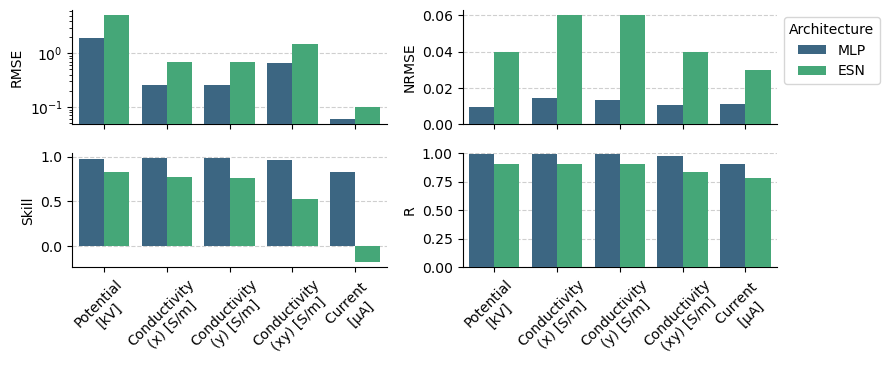

In [4]:
#plotting the results
#sns.set(style="whitegrid")
figs, axs = plt.subplots(2, 2, figsize=(9, 4), sharex=True)
#flatten the axs
axs = axs.flatten()

color = '#648FFF'
sns.barplot(x='run', y='rmse', data=df, ax=axs[0], hue='architecture', palette='viridis', legend=False, zorder=3)
axs[0].set_yscale('log')
sns.barplot(x='run', y='nrmse', data=df, ax=axs[1], hue='architecture', palette='viridis', legend=True, zorder=3)
sns.barplot(x='run', y='skill', data=df, ax=axs[2], hue='architecture',palette='viridis', legend=False, zorder=3)
sns.barplot(x='run', y='r', data=df, ax=axs[3], hue='architecture',palette='viridis', legend=False, zorder=3)
axs[3].set_ylim(0, 1)
axs[3].set_yticks(np.arange(0, 1.1, 0.25))
#axs[3].grid(axis='y', linestyle='--', alpha=0.5)

#remove legend from inside the ax[1]
axs[1].get_legend().remove()
#add legend to outside of axs[1] right hand side
axs[1].legend(loc='upper left', bbox_to_anchor=(1, 1), title='Architecture')
#change labels in legend
leg = axs[1].get_legend()
leg.set_title('Architecture')
for t, l in zip(leg.texts, ['MLP', 'ESN']):
    t.set_text(l)

#set the labels
axs[0].set_ylabel('RMSE')
axs[1].set_ylabel('NRMSE')
axs[2].set_ylabel('Skill')
axs[3].set_ylabel('R')

# Overlaying values onto bars in axs[5]
#for p in axs[2].patches:
#    axs[2].annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()-0.4), 
#                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

#for p in axs[3].patches:
#    axs[3].annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()-0.4), 
#                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

#remove top and right spines
for ax in axs:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(axis='y', linestyle='--', alpha=0.6, zorder=0)

#print mu 
mu = r'$\mathrm{\mu}$'
axs[2].set_xticklabels(['Potential\n[kV]', 'Conductivity\n(x) [S/m]', 'Conductivity\n(y) [S/m]',
                        'Conductivity\n(xy) [S/m]', f'Current \n[{mu}A]'], rotation=45)
axs[2].set_xlabel(' ')
axs[3].set_xlabel(' ')
mu = r'$\mathrm{\mu}$'
axs[3].set_xticklabels(['Potential\n[kV]', 'Conductivity\n(x) [S/m]', 'Conductivity\n(y) [S/m]',
                        'Conductivity\n(xy) [S/m]', f'Current \n[{mu}A]'], rotation=45)

plt.tight_layout()
plt.savefig('mlp_results_global.png', dpi=500)

Compare ESN and MLP on daily predictions at a statisical level

In [141]:
df = pd.read_csv("daily_esn_mlp_compare.csv")
df['R2'] = df['R']**2
df

,model,id,date,Kp,parameter,R,NRMSE,R2
0,MLP,7,2021-05-10,2,potential,0.06,0.27,0.0036
1,ESN,25,2021-05-10,2,potential,0.15,0.28,0.0225
2,MLP,7,2021-10-11,-4,potential,0.65,0.12,0.4225
3,ESN,25,2021-10-11,-4,potential,0.78,0.09,0.6084
4,MLP,7,2022-01-30,3,potential,0.77,0.10,0.5929
5,ESN,25,2022-01-30,3,potential,0.80,0.08,0.6400
6,MLP,7,2021-05-10,2,current,-0.06,0.15,0.0036
7,ESN,9,2021-05-10,2,current,0.02,0.11,0.0004
8,MLP,7,2021-10-11,-4,current,0.59,0.06,0.3481
9,ESN,9,2021-10-11,-4,current,0.67,0.05,0.4489


/tmp/ipykernel_7380/3738465227.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels([f'Potential\n[kV]', f'Current \n[{mu}A]', 'Conductivity\n(x) [S/m]', 'Conductivity\n(y) [S/m]',


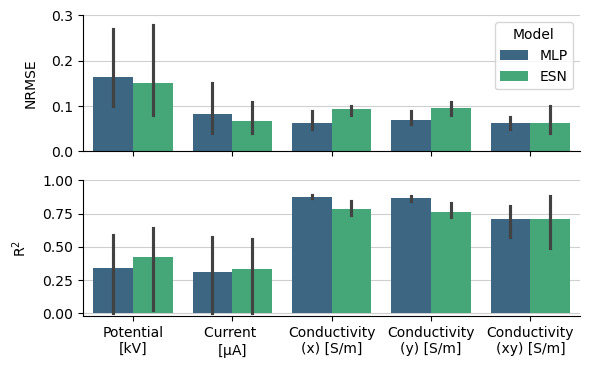

In [168]:
fig, ax = plt.subplots(2, 1, figsize=(6, 4), sharex=True)

sns.barplot(data=df, x='parameter', y='NRMSE', hue='model', palette='viridis', ax=ax[0], legend=True, zorder=2)
sns.barplot(data=df, x='parameter', y='R2', hue='model', palette='viridis', ax=ax[1], legend=False, zorder=2)
ax[0].set_ylim(0, 0.3)
ax[0].set_ylabel('NRMSE',labelpad=10)
#change legend title
leg = ax[0].get_legend()
leg.set_title('Model')

mu = r'$\mathrm{\mu}$'
ax[1].set_xticklabels([f'Potential\n[kV]', f'Current \n[{mu}A]', 'Conductivity\n(x) [S/m]', 'Conductivity\n(y) [S/m]',
                        'Conductivity\n(xy) [S/m]'], rotation=0)

ax[1].set_xlabel(' ')
R2 = r'$\mathrm{R^2}$'
ax[1].set_ylim(-0.02,1)
ax[1].set_yticks(np.arange(0, 1.1, 0.25))
ax[1].set_ylabel(f'{R2}',labelpad=10)

for ax in ax:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(axis='y', linestyle='-', alpha=0.6, zorder=0)

plt.tight_layout()

<Axes: xlabel='date', ylabel='NRMSE'>

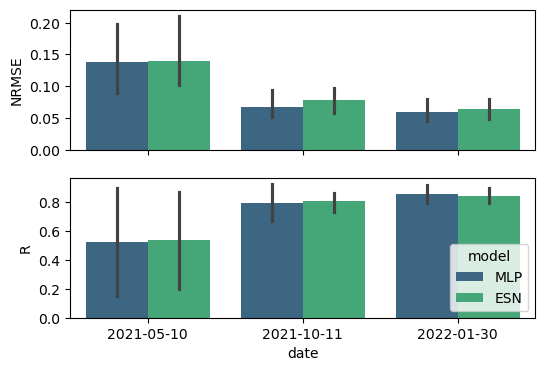

In [90]:
fig, ax = plt.subplots(2, 1, figsize=(6, 4), sharex=True)
sns.barplot(data=df, x='date', y='R', hue='model', palette='viridis', ax=ax[1], legend=True, zorder=2)
sns.barplot(data=df, x='date', y='NRMSE', hue='model', palette='viridis', ax=ax[0], legend=False, zorder=2)

/tmp/ipykernel_7380/2625964726.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax0.set_xticklabels([f'Potential\n[kV]', f'Current \n[{mu}A]', 'Conductivity\n(x) [S/m]', 'Conductivity\n(y) [S/m]',
/tmp/ipykernel_7380/2625964726.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(['21-05-10\nKp: 2', '21-10-11\nKp: 4-','22-01-30\nKp: 3'], rotation=0)
/tmp/ipykernel_7380/2625964726.py:39: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


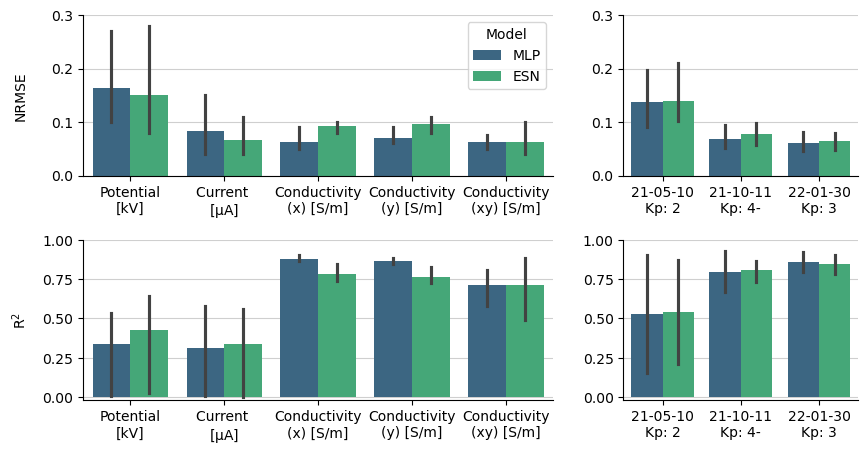

In [169]:
fig = plt.figure(figsize=(10, 5))
gs = GridSpec(2, 2, width_ratios=[4, 2], hspace=0.4)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1], sharey=ax0)
ax2 = fig.add_subplot(gs[1, 0], sharex=ax0)
ax3 = fig.add_subplot(gs[1, 1], sharey=ax2, sharex=ax1)

sns.barplot(data=df, x='parameter', y='NRMSE', hue='model', palette='viridis', ax=ax0, legend=True, zorder=2)
ax0.set_ylabel('NRMSE',labelpad=17)
ax0.set_xticklabels([f'Potential\n[kV]', f'Current \n[{mu}A]', 'Conductivity\n(x) [S/m]', 'Conductivity\n(y) [S/m]',
                        'Conductivity\n(xy) [S/m]'], rotation=0)
ax0.set_xlabel(' ')
leg = ax0.get_legend()
leg.set_title('Model')
ax0.set_ylim(0, 0.3)

sns.barplot(data=df, x='date', y='NRMSE', hue='model', palette='viridis', ax=ax1, legend=False, zorder=2)
ax1.set_xlabel(' ')
ax1.set_ylabel(' ')
ax1.set_xticklabels(['21-05-10\nKp: 2', '21-10-11\nKp: 4-','22-01-30\nKp: 3'], rotation=0)

sns.barplot(data=df, x='parameter', y='R2', hue='model', palette='viridis', ax=ax2, legend=False, zorder=2)
R2 = r'$\mathrm{R^2}$'
ax2.set_ylabel(f'{R2}',labelpad=10)
ax2.set_xlabel(' ')
ax2.set_ylim(-0.02,1)

sns.barplot(data=df, x='date', y='R', hue='model', palette='viridis', ax=ax3, legend=False, zorder=2)
ax3.set_xlabel(' ')
ax3.set_ylabel(' ')


for ax in [ax0, ax1, ax2, ax3]:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(axis='y', linestyle='-', alpha=0.6, zorder=0)

plt.tight_layout()
plt.savefig('mlp_esn_comparison_stats.png', dpi=500)